## Jeffrey Elkner

## Problem 1: Sampling Distribution

> Use the textbook example, that is, a population of values (6, 6, 5, 4, 4) to draw samples of size n=2.

(a). How many samples can we draw?   (4 points)

*SOLUTION*: We have $\binom{5}{2} = \frac{5!}{2!(5-2)!} = \frac{5 \cdot 4}{2} = 10$ possible samples. With elements labeled 'A' through 'E', the list of samples is:

In [1]:
labels = 'ABCDE'
i = 1
s = ''
for elem1 in labels[:-1]:
    for elem2 in labels[i:]:
        s += elem1 + elem2 + ', '
    i += 1
print(s[:-2])

AB, AC, AD, AE, BC, BD, BE, CD, CE, DE


(b). Draw the samples and calculate the sample means. (8 points)

In [2]:
# SOLUTION: Print the table and gather mean counts for use in part (c):
labels = 'ABCDE'
values = (6, 6, 5, 4, 5)
mean_counts = {}

print('ELEMS  VALUES  MEAN')

for i in range(len(values)):
    for j in range(i+1, len(values)):
        mean = (values[i] + values[j]) / 2
        
        print("{:7s}{:8s}{}".format(labels[i] + labels[j],
                                    str(values[i]) + ', ' + str(values[j]),
                                    mean))
        
        mean_counts[mean] = 1 if mean not in mean_counts else mean_counts[mean] + 1

ELEMS  VALUES  MEAN
AB     6, 6    6.0
AC     6, 5    5.5
AD     6, 4    5.0
AE     6, 5    5.5
BC     6, 5    5.5
BD     6, 4    5.0
BE     6, 5    5.5
CD     5, 4    4.5
CE     5, 5    5.0
DE     4, 5    4.5


(c). Display (Plot) the distribution of the sample means. (3 points)

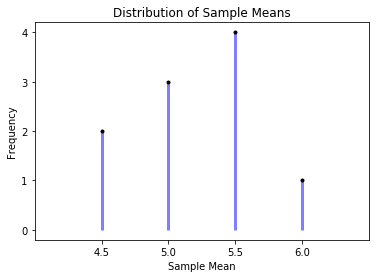

In [3]:
# SOLUTION
import matplotlib.pyplot as plt

mean_counts = sorted(mean_counts.items())
means = [mean_count[0] for mean_count in mean_counts]
freqs = [mean_count[1] for mean_count in mean_counts]

plt.plot(means, freqs, 'ko', ms=3)
plt.title('Distribution of Sample Means')
plt.xticks(means)
plt.xlabel('Sample Mean')
plt.xlim(min(means)-0.5, max(means)+0.5)
plt.yticks(range(0, max(freqs) + 1))
plt.ylabel('Frequency')
plt.vlines(means, 0, freqs, colors='b', lw=3, alpha=0.5)
plt.show()

## Problem 2: Confidence Interval (modified Problem 4 of Chapter 7 of the textbook)

One yield data set from 10 farms are given in the attached data sheet. Assuming the yields are normally distributed, determine the 95% and 99% confidence intervals on the population mean yield. (10 points)

In [4]:
# SOLUTION:
# I've already written mean and standard_deviation functions in ggs_tools.py,
# so I'll use them in a confidence_interval function for this exercise.
# (see ggs560_tools.py attached for source code).
import pandas as pd
from ggs560.ggs560_tools import confidence_interval as ci

file = 'GGS560_HW5_Data.xlsx'
xl = pd.ExcelFile(file)
d = xl.parse('P2')['x']

for p in 95, 99:
    print('The {}% confidence interval for the data set is {}'.format(p, ci(d, p)))

The 95% confidence interval for the data set is [30.499, 37.321]
The 99% confidence interval for the data set is [29.010, 38.810]


## Problem 3: Confidence Interval (modified Problem 7 of Chapter 7 of the textbook)

A historical geographer is interested in the average number of children of households in a certain city in 1800. Rather than spend the time analyzing each entry in the city directory, she decides to sample randomly from the directory and estimate the size from this sample.  In a sample of 56 households, she finds the average number of children to be 4.46 with a standard deviation of 2.06.

(a). Find the 99% confidence interval, using the t-distribution. (5 points)

In [5]:
# SOLUTION: Add a confidence_interval2 function with appropriate parameters.
# (see ggs560_tools.py attached for source code).
from ggs560.ggs560_tools import confidence_interval2 as ci2

s = 'The {}% confidence interval for the given information is {}'
print(s.format(99, ci2(4.46, 2.06, 56, 99)))

The 99% confidence interval for the given information is [3.725, 5.195]


(b). Find the 99% confidence interval, using the z-distribution. (5 points)

In [6]:
# SOLUTION: From the Standard Normal Probabilities table in Table A-3
# of our text, z_0.005 = 2.58, thus

offset = 2.58 * 2.06 / 56 ** 0.5
s = 'The {}% confidence interval for the given information is [{:0.3f}, {:0.3f}]'
print(s.format(99, 4.46 - offset, 4.46 + offset))

The 99% confidence interval for the given information is [3.750, 5.170]


## Problem 4: Multiple Choice (5 points, 2+3)

Given the widths of confidence intervals based on the t-distribution with a degree-of-freedom 10 (CIWt) and the standard normal distribution (CIWnorm) for a given confidence level (say, 95%) one can find that

    a.  CIWt > CIWnorm
    b.  CIWt < CIWnorm
    c.  CIWt = CIWnorm
    d. none of a, b, and c. 

*SOLUTION*: a. CIWt > CIWnorm. The t-distribution provides less confidence, and thus a wider interval, than the standard normal distribution.

In a coin toss, which of the following would give you the greatest grounds for suspicion?

    a. in 100 throws, 70 heads and 30 tails
    b. in 20 throws, 14 heads and 6 tails
    c. in 200 throws, 140 heads and 60 tails
    d. in 200 throws, 120 heads and 80 tails

In [7]:
# SOLUTION: c. 140 heads and 60 tails in 200 throws. This result
# is fairly intuitive since the expected value of a fair coin
# toss is 0.5, and the more times the coin is tossed the closer
# to this value we would expect the result to be. a, b, and c all
# have the same proportion of 70% heads, which is further from
# the expected value of 50% heads than the 60% heads in d. Since
# c has the largest number of trials among these, it is the
# most problematic result.  More formally, we can use equation
# 7-8 from page 314 of our text to look at the 99% confidence
# intervals:

def confidence_interval_for_pi(heads, throws, z_alpha_over_2):
    p = heads / throws
    offset = z_alpha_over_2 * (p * (1 - p) / throws) ** 0.5
    s = '?: {:0.3f} <= 0.5 <= {:0.3f}'
    return s.format(p - offset, p + offset)

print("The 99% confidence interval:")
for h, t in [(70, 100), (14, 20), (140, 200), (120, 200)]:
    print(confidence_interval_for_pi(h, t, 2.58))

The 99% confidence interval:
?: 0.582 <= 0.5 <= 0.818
?: 0.436 <= 0.5 <= 0.964
?: 0.616 <= 0.5 <= 0.784
?: 0.511 <= 0.5 <= 0.689


From these results, a, c, and d are all supicious, but c is still
the most so.